In [1]:
# 다양한 분석 주제를 다루는데, 분석마다 2단계로 진행

# 1단계 : 변수 검토 및 전처리
# 분석에 활용할 변수를 전처리.
# 변수의 특징을 파악하고 이상치와 결측치를 정제한 다음, 변수의 값을 다루기 편하게 바꿈.
# 전처리는 분석에 활용할 변수 각각 진행.

# 2단계 : 변수 간 관계 분석
# 전처리를 완료하면 본격적으로 변수 간 관계를 파악하는 분석을 함.
# 데이터를 요약한 표와 데이터의 특징을 쉽게 이해할 수 있는 그래프를 만든 다음 분석 결과를 해석.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pyreadstat
import matplotlib
import matplotlib.pyplot as plt

### 02. 성별에 따른 월급 차이 - 성별에 따라 월급이 다를까? 

In [3]:
# 분석 절차
# 1단계 : 변수 검토 및 전처리
# 성별 / 월급
# 2단꼐 : 변수 간 관계 분석
# 성별 월급 평균표 만들기 / 그래프 만들기

In [4]:
# 1. 성별 변수 검토 및 전처리하기
# 1) 변수 검토하기

welfare = pd.read_csv('./data/Koweps_hpwc14_2019_beta2_step_01.csv')
welfare.head()
# chapter10_data_analysis\pandas03\data\

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,NaN,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN


In [5]:
# sex 성별 변수의 타입을 파악
welfare['sex'].dtype

dtype('float64')

In [6]:
# value_counts() 를 이용해 각 범주마다 몇 명이 있는지 알아봄.
welfare['sex'].value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [7]:
# 2) 전처리하기
# 코드북을 보면 성별 변수의 값이 1이면 남자, 2면 여자를 의미. 모른다고 답하거나 응답하지 않으면 9로 입력.
# 이 정보를 바탕으로 데이터에 이상치가 있는지 검토하고, 분석할 때 제거하기 편하도록 NaN을 부여해 결측치 처리.
# 즉 값이 9인 경우 성별을 알 수 없어 분석에서 제외해야 하므로 결측 처리.

# 이상치 확인 <- 이거할 때  value_count() 가 좋다.
welfare['sex'].value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [8]:
# 1, 2만 있고 9나 다른 값이 없으니 이상치를 결측 처리하는 절차를 건너 뛰어도 됨.
# 만일 이상치가 있으면 이상치를 결측 처리한 후에 다음 결측치 확인.

# 이상치 결측 처리
# sex 열에서 9인 값을 NaN으로 변경.
# np.where(condition, T, F)
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])

# 결측치 확인
welfare['sex'].isna().sum()

0

In [9]:
# 성별이 1,2 로 되어 있어, 값의 의미를 이해하기 쉽도록 문자 male 과 female로 변경.
# 변경 후 잘 반영이 되었는지 value_counts() 와 countplot() 을 이용해 바꾼 값이 잘 반영이 됐는지 출력 결과를 확인.

# 성별 항목 이름 부여
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')
# 1이면 남성 아니라면 여성

In [10]:
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

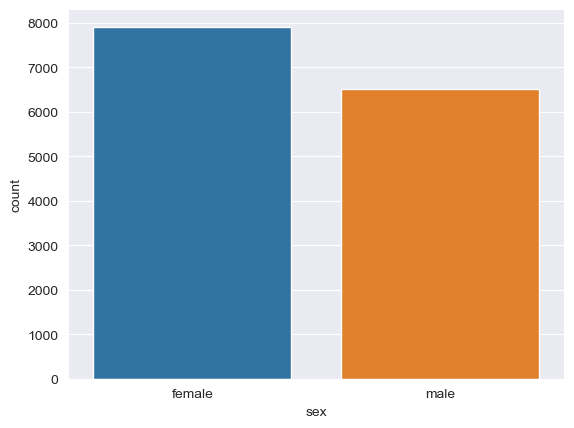

In [11]:
# 빈도 막대 그래프 만들기
sns.countplot(data=welfare, x='sex')
plt.show()

In [12]:
# 작업한 데이터프레임을 csv 로 저장.    # 얘는 끝 숫자가 2임
welfare.to_csv('./data/Koweps_hpwc14_2019_beta2_step_02.csv', index=False)